In [10]:
import pandas as pd
import json
from tool import load_data, store_data
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [11]:
phone_data_file = 'data/newPhone.json'

phone_data = load_data.load_json_data(phone_data_file)
phone_data = phone_data['phones']

In [12]:
phone_data_dict = {}
id = 0
for each_phone in phone_data:
    id += 1
    phone_data_dict[id] = each_phone

phone_data_df = pd.DataFrame.from_dict(phone_data_dict, orient='index')

print(len(phone_data_df.columns))
print(phone_data_df.columns)

25
Index(['modelname', 'brand', 'url', 'img', 'nettech', 'year', 'storage', 'ram',
       'd1', 'd2', 'd3', 'weight', 'displaysize', 'displayratio',
       'resolution1', 'resolution2', 'cpu', 'os1', 'cam1', 'cam2', 'nfc',
       'gps', 'battery', 'price', 'popularity'],
      dtype='object')


In [13]:
numerical_attributes = ['d1', 'd2', 'd3', 'weight', 'displaysize', \
                        'resolution1', 'resolution2','cam1', 'cam2', 'battery', 'price', 'popularity']
categorical_attributes = ['brand','nettech', 'cpu','os1', 'nfc', 'gps' ]
other_to_be_processed = ['year', 'displayratio', 'storage', 'ram']

print(len(numerical_attributes))
print(len(categorical_attributes))
print(len(other_to_be_processed))

12
6
4


In [14]:
# new Phone data - numerical attributes - descriptive analysis
print(phone_data_df.describe())

               d1          d2          d3      weight  displaysize  \
count  999.000000  999.000000  999.000000  999.000000   999.000000   
mean   154.470070   74.437037    8.463964  172.575075     5.901151   
std      7.457582    3.642434    1.068582   25.692931     0.566099   
min     96.600000   50.600000    6.000000   62.500000     2.800000   
25%    149.900000   72.600000    7.900000  155.000000     5.500000   
50%    155.500000   74.900000    8.300000  170.000000     6.000000   
75%    158.900000   76.000000    8.800000  186.000000     6.355000   
max    177.800000  117.900000   18.000000  469.000000     7.300000   

       resolution1  resolution2        cam1        cam2      battery  \
count   999.000000   999.000000  999.000000  999.000000   999.000000   
mean    956.585586  1918.298298   20.139940   12.642543  3570.325325   
std     268.972498   528.154532   16.394366    7.970224   779.227199   
min     240.000000   320.000000    2.000000    0.300000     3.000000   
25%     7

### Data Transformation

#### Numerical Attributes

1. Publish date (Year)

In [15]:
import time, datetime
import re

number_pattern = re.compile(r'\d+')   # 查找数字
year_data = phone_data_df['year']

transformed_published_date = [0]
extracted_year = [0]
for i in range(1, len(year_data)+1):
    data_split = year_data[i].split(',')
    published_date = None
    year = 0
    # case: only Year
    if len(data_split) == 1:
        year = int(data_split[0].strip())
        published_date = datetime.date(year=year, month=1, day=1)
    
    # case: Year + Month + Day (optional)
    if len(data_split) == 2:
        year = int(data_split[0].strip())
        month_name = data_split[1].strip()
        day = 1
        
        # check if there is quarter - expression
        quarter_pattern = re.compile(r'Q\d+',)
        
        # case 1: include day
        if ' ' in month_name:
            month_day = month_name.split(' ')
            month = month_day[0]
            month_number = time.strptime(month, "%B").tm_mon
            day = int(month_day[1])
        # case 2: use quarter
        elif quarter_pattern.match(month_name):
            month_number = (int(number_pattern.findall(month_name)[0]) - 1) * 3 + 1
        # case 3: only month
        else:
            month_number = time.strptime(month_name, "%B").tm_mon

        published_date = datetime.date(year=year, month=month_number, day=day)
        published_date_timestamp = time.mktime(published_date.timetuple())
        print(published_date_timestamp)
    extracted_year.append(year)
    transformed_published_date.append(published_date_timestamp)
    
phone_data_df['year_details'] = phone_data_df['year']

1530374400.0
1517414400.0
1530374400.0
1514736000.0
1535731200.0
1517414400.0
1504195200.0
1504195200.0
1496246400.0
1504195200.0
1501516800.0
1546272000.0
1554048000.0
1567267200.0
1546272000.0
1577808000.0
1577808000.0
1577808000.0
1527782400.0
1541001600.0
1504195200.0
1485878400.0
1496246400.0
1554048000.0
1577808000.0
1504195200.0
1504195200.0
1535731200.0
1504195200.0
1567267200.0
1567267200.0
1567267200.0
1506787200.0
1501516800.0
1496246400.0
1485878400.0
1548950400.0
1548950400.0
1522512000.0
1527782400.0
1517414400.0
1525104000.0
1517414400.0
1485878400.0
1509465600.0
1498838400.0
1517414400.0
1501516800.0
1483200000.0
1538323200.0
1501516800.0
1501516800.0
1538323200.0
1504195200.0
1501516800.0
1483200000.0
1483200000.0
1493568000.0
1501516800.0
1504195200.0
1506787200.0
1551369600.0
1551369600.0
1533052800.0
1527782400.0
1533052800.0
1488297600.0
1504195200.0
1533052800.0
1535731200.0
1543593600.0
1538323200.0
1535731200.0
1527782400.0
1501516800.0
1522512000.0
1533052800.0

In [16]:
phone_data_df['year_timestamp'] = pd.Series(transformed_published_date)
phone_data_df['year'] =  pd.Series(extracted_year)

In [18]:
phone_data_df['year'] 

1      2018
2      2018
3      2018
4      2018
5      2018
       ... 
995    2020
996    2018
997    2018
998    2017
999    2018
Name: year, Length: 999, dtype: int64

2. Storage ("storage")

In [19]:
phone_data_df['storage'].value_counts()

64GB     319
32GB     258
16GB     181
128GB    178
8GB       33
256GB     25
512GB      4
4GB        1
Name: storage, dtype: int64

In [20]:
number_storage_list = [0]
for i in range(1, len(phone_data_df['storage'])+1):
    i_storage = phone_data_df['storage'][i]
    number_storage = int(number_pattern.findall(i_storage)[0])
    number_storage_list.append(number_storage)
phone_data_df['storage'] = pd.Series(number_storage_list)
phone_data_df['storage'].value_counts()

64     319
32     258
16     181
128    178
8       33
256     25
512      4
4        1
Name: storage, dtype: int64

3. Random Access Memory ("ram") 

In [21]:
phone_data_df['ram'].head()

1    1GB
2    2GB
3    3GB
4    1GB
5    2GB
Name: ram, dtype: object

In [22]:
phone_data_df['ram'].value_counts()
number_ram_list = [0]
for i in range(1, len(phone_data_df)+1):
    i_ram = phone_data_df['ram'][i]
    if i_ram == '1.5GB':
        number_ram = 1.5
    elif i_ram == '512MB':
        number_ram = 0.5
    else:
        number_ram = int(number_pattern.findall(i_ram)[0])
    number_ram_list.append(number_ram)
phone_data_df['ram'] = pd.Series(number_ram_list)

In [23]:
phone_data_df['ram'].head()

1    1.0
2    2.0
3    3.0
4    1.0
5    2.0
Name: ram, dtype: float64

4. Display ratio ("displayratio")

In [24]:
phone_data_df['displayratio'].head()

1    71.4%
2    75.5%
3    84.5%
4    75.9%
5    67.2%
Name: displayratio, dtype: object

In [25]:
number_displayratio_list = [0]
for i in range(1, len(phone_data_df)+1):
    i_displayratio = phone_data_df['displayratio'][i]
    number_displayratio = float(i_displayratio.replace("%", ""))
    number_displayratio_list.append(number_displayratio)
phone_data_df['displayratio'] = pd.Series(number_displayratio_list)
phone_data_df['displayratio'].head()

1    71.4
2    75.5
3    84.5
4    75.9
5    67.2
Name: displayratio, dtype: float64

In [26]:
phone_data_df.describe()

,year,storage,ram,d1,d2,d3,weight,displaysize,displayratio,resolution1,resolution2,cam1,cam2,battery,price,popularity,year_timestamp
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,2016.182182,63.131131,4.010010,154.470070,74.437037,8.463964,172.575075,5.901151,77.776176,956.585586,1918.298298,20.139940,12.642543,3570.325325,291.121221,1.860859e+06,1.534765e+09
std,63.859697,56.987270,2.069533,7.457582,3.642434,1.068582,25.692931,0.566099,7.428402,268.972498,528.154532,16.394366,7.970224,779.227199,228.426620,3.274196e+06,2.912978e+07
min,0.000000,4.000000,0.500000,96.600000,50.600000,6.000000,62.500000,2.800000,26.700000,240.000000,320.000000,2.000000,0.300000,3.000000,40.000000,1.435000e+03,1.483200e+09
25%,2017.000000,32.000000,3.000000,149.900000,72.600000,7.900000,155.000000,5.500000,71.850000,720.000000,1440.000000,12.000000,8.000000,3000.000000,152.600000,2.206205e+05,1.509466e+09
50%,2018.000000,64.000000,4.000000,155.500000,74.900000,8.300000,170.000000,6.000000,79.500000,1080.000000,1920.000000,13.000000,8.000000,3500.000000,218.000000,6.566370e+05,1.535731e+09
75%,2019.000000,64.000000,6.000000,158.900000,76.000000,8.800000,186.000000,6.355000,83.600000,1080.000000,2340.000000,16.000000,16.000000,4000.000000,357.990000,2.060220e+06,1.559318e+09
max,2020.000000,512.000000,12.000000,177.800000,117.900000,18.000000,469.000000,7.300000,94.100000,3840.000000,3840.000000,108.000000,40.000000,9000.000000,2099.990000,4.099152e+07,1.585498e+09


#### Categorical Attributes

1. Phone Size

In [27]:
phone_data_df.boxplot(['d1','d2', 'd3'])
print(phone_data_df[['d1','d2', 'd3']].describe())
print(phone_data_df[['d1','d2', 'd3']].corr(method='pearson'))
bins = 3
phone_size = pd.qcut(phone_data_df['d1'],bins, labels=['small', 'medium', 'large'])
phone_thickness = pd.qcut(phone_data_df['d3'],bins, labels=['thin', 'medium', 'thick'])

phone_data_df['phone_size'] = phone_size
phone_data_df['phone_thickness'] = phone_thickness



               d1          d2          d3
count  999.000000  999.000000  999.000000
mean   154.470070   74.437037    8.463964
std      7.457582    3.642434    1.068582
min     96.600000   50.600000    6.000000
25%    149.900000   72.600000    7.900000
50%    155.500000   74.900000    8.300000
75%    158.900000   76.000000    8.800000
max    177.800000  117.900000   18.000000
          d1        d2        d3
d1  1.000000  0.689609 -0.113643
d2  0.689609  1.000000 -0.066073
d3 -0.113643 -0.066073  1.000000


In [28]:
phone_size.value_counts()

medium    341
small     333
large     325
Name: d1, dtype: int64

In [29]:
phone_thickness.value_counts()

thin      377
thick     318
medium    304
Name: d3, dtype: int64

2. Weight

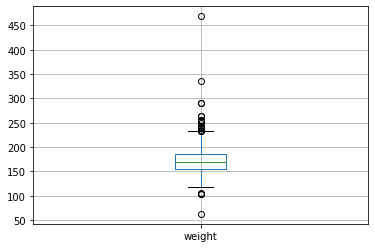

In [30]:
# Disribution of Weight
phone_data_df.boxplot(['weight'])
phone_data_df['weight'].describe()
phone_weight = pd.qcut(phone_data_df['weight'],bins, labels=['light', 'medium', 'heavy'])
phone_data_df['weight(label)'] = phone_weight

In [31]:
phone_weight.value_counts()

light     343
medium    331
heavy     325
Name: weight, dtype: int64

3. Resolution

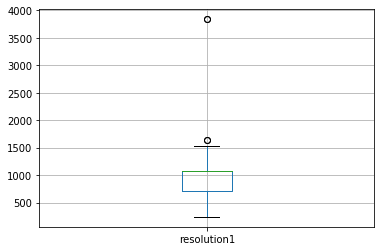

In [32]:
phone_data_df.boxplot(['resolution1'])
phone_data_df['resolution1'].describe()
phone_resolution = pd.qcut(phone_data_df['resolution1'],bins, labels=['low', 'medium', 'high'])
phone_data_df['resolution'] = phone_resolution

In [33]:
phone_data_df['resolution'].value_counts()

medium    521
low       397
high       81
Name: resolution, dtype: int64

4. NFC

In [34]:
phone_data_df['nfc'].head()

1                null
2    Yes (5099Y only)
3                 Yes
4                null
5                null
Name: nfc, dtype: object

In [35]:

phone_data_df['nfc'].value_counts()

nfc_label_list = [0]

for i in range(1, len(phone_data_df)+1):
    i_nfc = phone_data_df['nfc'][i]
    if i_nfc == 'null' or i_nfc == 'No':
        nfc_label_list.append('No')
    elif 'Yes' in i_nfc:
        nfc_label_list.append('Yes')
    else:
        print(i_nfc)
        input()

phone_data_df['nfc_label'] = pd.Series(nfc_label_list)
phone_data_df['nfc_label'] 

1       No
2      Yes
3      Yes
4       No
5       No
      ... 
995    Yes
996    Yes
997    Yes
998     No
999    Yes
Name: nfc_label, Length: 999, dtype: object

In [36]:
phone_data_df['nfc_label'].head()

1     No
2    Yes
3    Yes
4     No
5     No
Name: nfc_label, dtype: object

5. GPS

In [37]:
phone_data_df['gps'].head()

1    Yes,
2    Yes,
3    Yes,
4    Yes,
5    Yes,
Name: gps, dtype: object

In [38]:
phone_data_df['gps'].value_counts()

Yes,    999
Name: gps, dtype: int64

6. CPU

In [39]:
# filter one phone that did not indicate the cpu
phone_data_updated_df = phone_data_df[phone_data_df['cpu'] != 'null']

In [40]:
phone_data_updated_df.columns

Index(['modelname', 'brand', 'url', 'img', 'nettech', 'year', 'storage', 'ram',
       'd1', 'd2', 'd3', 'weight', 'displaysize', 'displayratio',
       'resolution1', 'resolution2', 'cpu', 'os1', 'cam1', 'cam2', 'nfc',
       'gps', 'battery', 'price', 'popularity', 'year_details',
       'year_timestamp', 'phone_size', 'phone_thickness', 'weight(label)',
       'resolution', 'nfc_label'],
      dtype='object')

In [41]:
columns_map_dict = {'nfc':'nfc_details', 'weight':'weight_details', 'weight(label)':'weight', 'nfc_label':'nfc'}
phone_data_updated_df = phone_data_updated_df.rename(columns=columns_map_dict)

In [31]:
# 2020-04-25
# columns_names = ['modelname', 'brand', 'url', 'img', 'nettech', 'year','year_details', 'storage', 'ram', 'phone_size', \
#                  'd1', 'd2', 'phone_thickness', 'd3', 'weight',  'weight_details', 'displaysize', 'displayratio', 'resolution', 'resolution1', 'resolution2',\
#                  'cpu', 'os1', 'cam1', 'cam2', 'nfc', 'nfc_details', 'battery', 'price', 'popularity']

# new_phone_data_updated_df = phone_data_updated_df[columns_names]

# new_phone_data_updated_df.to_json('data/new_phone_data_v2.json', orient='records')



In [46]:
# 2020-05-05
columns_names = ['modelname', 'brand', 'url', 'img', 'nettech', 'year','year_details', 'storage', 'ram', 'phone_size', \
                 'd1', 'd2', 'phone_thickness', 'd3', 'weight',  'weight_details', 'displaysize', 'displayratio', 'resolution', 'resolution1', 'resolution2',\
                 'cpu', 'os1', 'cam1', 'cam2', 'nfc', 'nfc_details', 'battery', 'price', 'popularity']

new_phone_data_updated_df = phone_data_updated_df[columns_names]


new_phone_data_updated_df = new_phone_data_updated_df[new_phone_data_updated_df['year']>2017]

new_phone_data_updated_df.to_json('data/new_phone_data_v3.json', orient='records')

In [47]:
phone_data_file = 'data/new_phone_data_v3.json'

phone_data = load_data.load_json_data(phone_data_file)
phone_data_json = {'phones':phone_data}


store_data.store_data_to_json(phone_data_json, phone_data_file)

'[Successfully store in json file]'

In [49]:
phone_data_dict = {}
id = 0
for each_phone in phone_data:
    id += 1
    phone_data_dict[id] = each_phone

phone_data_df = pd.DataFrame.from_dict(phone_data_dict, orient='index')


print(len(phone_data_df.columns))
print(phone_data_df.columns)

30
Index(['modelname', 'brand', 'url', 'img', 'nettech', 'year', 'year_details',
       'storage', 'ram', 'phone_size', 'd1', 'd2', 'phone_thickness', 'd3',
       'weight', 'weight_details', 'displaysize', 'displayratio', 'resolution',
       'resolution1', 'resolution2', 'cpu', 'os1', 'cam1', 'cam2', 'nfc',
       'nfc_details', 'battery', 'price', 'popularity'],
      dtype='object')


In [50]:
len(phone_data_df)

726

In [45]:
numerical_attributes = ['year', 'storage', 'ram', 'displaysize', 'displayratio'
                       ,'cam1', 'cam2', 'battery', 'price', 'popularity']
categorical_attributes = ['brand','nettech','phone_size','phone_thickness', 'weight', 'resolution', 'cpu','os1', 'nfc' ]

print(len(numerical_attributes))
print(len(categorical_attributes))

10
9
